In [1]:
import re
import requests
source='https://baike.baidu.com/'

In [2]:
rule_line='地铁///线///</span>运行时间|</span>//</span>运营时间|</span>//</span>运营线路|</span>'
rule_station='站///线车站列表|</table>//</span>车站列表|</table>//运营时刻表|</table>'


In [3]:
def get_list(clue,key,table_scopes):
    if not clue: print('找不到相关信息')
    url=source+'item/'+clue
    headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}
    content = requests.get(url, headers=headers).content.decode('utf8')
    list=[]
    for table_scope in table_scopes:
        table_start, table_end = table_scope.split('|')
        if table_start not in content: continue
        table = re.findall(r""+table_start+"(.+?)"+table_end,content, re.S)[0]
        #print(table)
        #list=[]
        for l in re.findall(r'>(\w+)'+key+'<',table):
            list.append(l+key)
            if len(list)>1 and list[-1]==list[-2]: list.pop(-1)
        if list: break
    if list==[]: print('找不到信息')
    #print(list)
    #print(len(list))
    return list

In [4]:
from collections import defaultdict

In [5]:
def graph(city,rule_line,rule_station):
    stations_graph = defaultdict(set)
    line_stations = {}
    lines = get_list(city+rule_line.split('///')[0],rule_line.split('///')[1],rule_line.split('///')[2].split('//'))
    for line in lines:
        #print(line)
        stations = get_list(line,rule_station.split('///')[0],rule_station.split('///')[1].split('//'))
        stations_graph[stations[0]].add(stations[1])
        stations_graph[stations[-1]].add(stations[-2])
        for i in range(1,len(stations)-1):
            stations_graph[stations[i]].add(stations[i+1])
            stations_graph[stations[i]].add(stations[i-1])
        line_stations[line] = stations
    return stations_graph,line_stations

In [6]:
stations_graph,line_stations = graph('北京',rule_line,rule_station)

In [7]:
line_stations['北京地铁16号线']

['宛平城站',
 '榆树庄站',
 '看丹站',
 '富丰桥站',
 '丰台南路站',
 '丰台站',
 '丰益桥南站',
 '丽泽商务区站',
 '红莲南里站',
 '达官营站',
 '木樨地站',
 '玉渊潭东门站',
 '甘家口站',
 '二里沟站',
 '国家图书馆站',
 '万寿寺站',
 '苏州桥站',
 '苏州街站',
 '万泉河桥站',
 '西苑站',
 '农大南路站',
 '马连洼站',
 '西北旺站',
 '永丰南站',
 '永丰站',
 '屯佃站',
 '稻香湖路站',
 '温阳路站',
 '北安河站']

In [8]:
line_stations['北京地铁4号线']

['天宫院站',
 '生物医药基地站',
 '义和庄站',
 '黄村火车站',
 '黄村西大街站',
 '清源路站',
 '枣园站',
 '高米店南站',
 '高米店北站',
 '西红门站',
 '新宫站',
 '公益西桥站',
 '角门西站',
 '马家堡站',
 '北京南站',
 '陶然亭站',
 '菜市口站',
 '宣武门站',
 '西单站',
 '灵境胡同站',
 '西四站',
 '平安里站',
 '新街口站',
 '西直门站',
 '动物园站',
 '国家图书馆站',
 '魏公村站',
 '人民大学站',
 '海淀黄庄站',
 '中关村站',
 '北京大学东门站',
 '圆明园站',
 '西苑站',
 '北宫门站',
 '安河桥北站']

In [9]:
stations_graph['西苑站']

{'万泉河桥站', '农大南路站', '北宫门站', '圆明园站'}

In [10]:
stations_graph 

defaultdict(set,
            {'七里庄站': {'丰台东大街站', '六里桥站', '大井站', '西局站'},
             '万寿寺站': {'国家图书馆站', '苏州桥站'},
             '万寿路站': {'五棵松站', '公主坟站'},
             '万泉河桥站': {'苏州街站', '西苑站'},
             '万源街站': {'亦庄文化园站', '荣京东街站'},
             '万盛南街西口站': {'云景东路站', '黑庄户站'},
             '三元桥站': {'亮马桥站', '太阳宫站'},
             '上地站': {'清华东路西口站', '清河站'},
             '上清桥站': {'学清路站', '清河站'},
             '东单站': {'崇文门站', '建国门站', '灯市口站', '王府井站'},
             '东四十条站': {'东直门站', '朝阳门站'},
             '东四站': {'南锣鼓巷站', '张自忠路站', '朝阳门站', '灯市口站'},
             '东夏园站': {'潞城站', '郝家府站'},
             '东大桥站': {'呼家楼站', '朝阳门站'},
             '东湖渠站': {'望京站', '来广营站'},
             '东直门站': {'东四十条站', '柳芳站', '雍和宫站'},
             '东管头站': {'丽泽商务区站', '西局站'},
             '东风北桥站': {'将台站', '枣营站'},
             '东高地站': {'和义站', '火箭万源站'},
             '中关村站': {'北京大学东门站', '海淀黄庄站'},
             '中国美术馆站': {'南锣鼓巷站', '金鱼胡同站'},
             '丰台东大街站': {'七里庄站', '丰台南路站'},
             '丰台南路站': {'丰台东大街站', '丰台站', '富丰桥站', '科

In [11]:
line_stations

{'北京地铁10号线': ['巴沟站',
  '苏州街站',
  '海淀黄庄站',
  '知春里站',
  '知春路站',
  '西土城站',
  '牡丹园站',
  '健德门站',
  '北土城站',
  '安贞门站',
  '惠新西街南口站',
  '芍药居站',
  '太阳宫站',
  '三元桥站',
  '亮马桥站',
  '农业展览馆站',
  '团结湖站',
  '呼家楼站',
  '金台夕照站',
  '国贸站',
  '双井站',
  '劲松站',
  '潘家园站',
  '十里河站',
  '分钟寺站',
  '成寿寺站',
  '宋家庄站',
  '石榴庄站',
  '大红门站',
  '角门东站',
  '角门西站',
  '草桥站',
  '纪家庙站',
  '首经贸站',
  '丰台站',
  '泥洼站',
  '西局站',
  '六里桥站',
  '莲花桥站',
  '公主坟站',
  '西钓鱼台站',
  '慈寿寺站',
  '车道沟站',
  '长春桥站',
  '火器营站',
  '巴沟站'],
 '北京地铁13号线': ['西直门站',
  '明光桥西站',
  '大钟寺站',
  '知春路站',
  '五道口站',
  '清华东路西口站',
  '上地站',
  '清河站',
  '西二旗站',
  '龙泽站',
  '回龙观站',
  '霍营站',
  '建材城东路站',
  '立水桥站',
  '北苑站',
  '来广营西站',
  '望京西站',
  '望和桥站',
  '芍药居站',
  '光熙门站',
  '柳芳站',
  '东直门站'],
 '北京地铁14号线': ['张郭庄站',
  '园博园站',
  '大瓦窑站',
  '郭庄子站',
  '大井站',
  '七里庄站',
  '西局站',
  '东管头站',
  '丽泽商务区站',
  '菜户营站',
  '西铁营站',
  '景风门站',
  '北京南站',
  '陶然桥站',
  '永定门外站',
  '景泰站',
  '蒲黄榆站',
  '方庄站',
  '十里河站',
  '北工大西门站',
  '平乐园站',
  '九龙山站',
  '大望路站',
  '红庙站',
  '预留车站',
  '金台路站',
  '朝阳公园站',
  '枣营站',
  

In [12]:
stations_line = defaultdict(list)
for line in line_stations.keys():
    for station in line_stations[line]:
        stations_line[station].append(line)

In [13]:
stations_line

defaultdict(list,
            {'七里庄站': ['北京地铁9号线', '北京地铁14号线'],
             '万寿寺站': ['北京地铁16号线'],
             '万寿路站': ['北京地铁1号线'],
             '万泉河桥站': ['北京地铁16号线'],
             '万源街站': ['北京地铁亦庄线'],
             '万盛南街西口站': ['北京地铁7号线'],
             '三元桥站': ['北京地铁10号线'],
             '上地站': ['北京地铁13号线'],
             '上清桥站': ['北京地铁昌平线'],
             '东单站': ['北京地铁1号线', '北京地铁5号线'],
             '东四十条站': ['北京地铁2号线'],
             '东四站': ['北京地铁5号线', '北京地铁6号线'],
             '东夏园站': ['北京地铁6号线'],
             '东大桥站': ['北京地铁6号线'],
             '东湖渠站': ['北京地铁14号线'],
             '东直门站': ['北京地铁2号线', '北京地铁13号线'],
             '东管头站': ['北京地铁14号线'],
             '东风北桥站': ['北京地铁14号线'],
             '东高地站': ['北京地铁8号线'],
             '中关村站': ['北京地铁4号线'],
             '中国美术馆站': ['北京地铁8号线'],
             '丰台东大街站': ['北京地铁9号线'],
             '丰台南路站': ['北京地铁9号线', '北京地铁16号线'],
             '丰台科技园站': ['北京地铁9号线'],
             '丰台站': ['北京地铁10号线', '北京地铁16号线'],
             '丰益桥南站': ['北京地铁16号线', '北京地铁房山线']

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

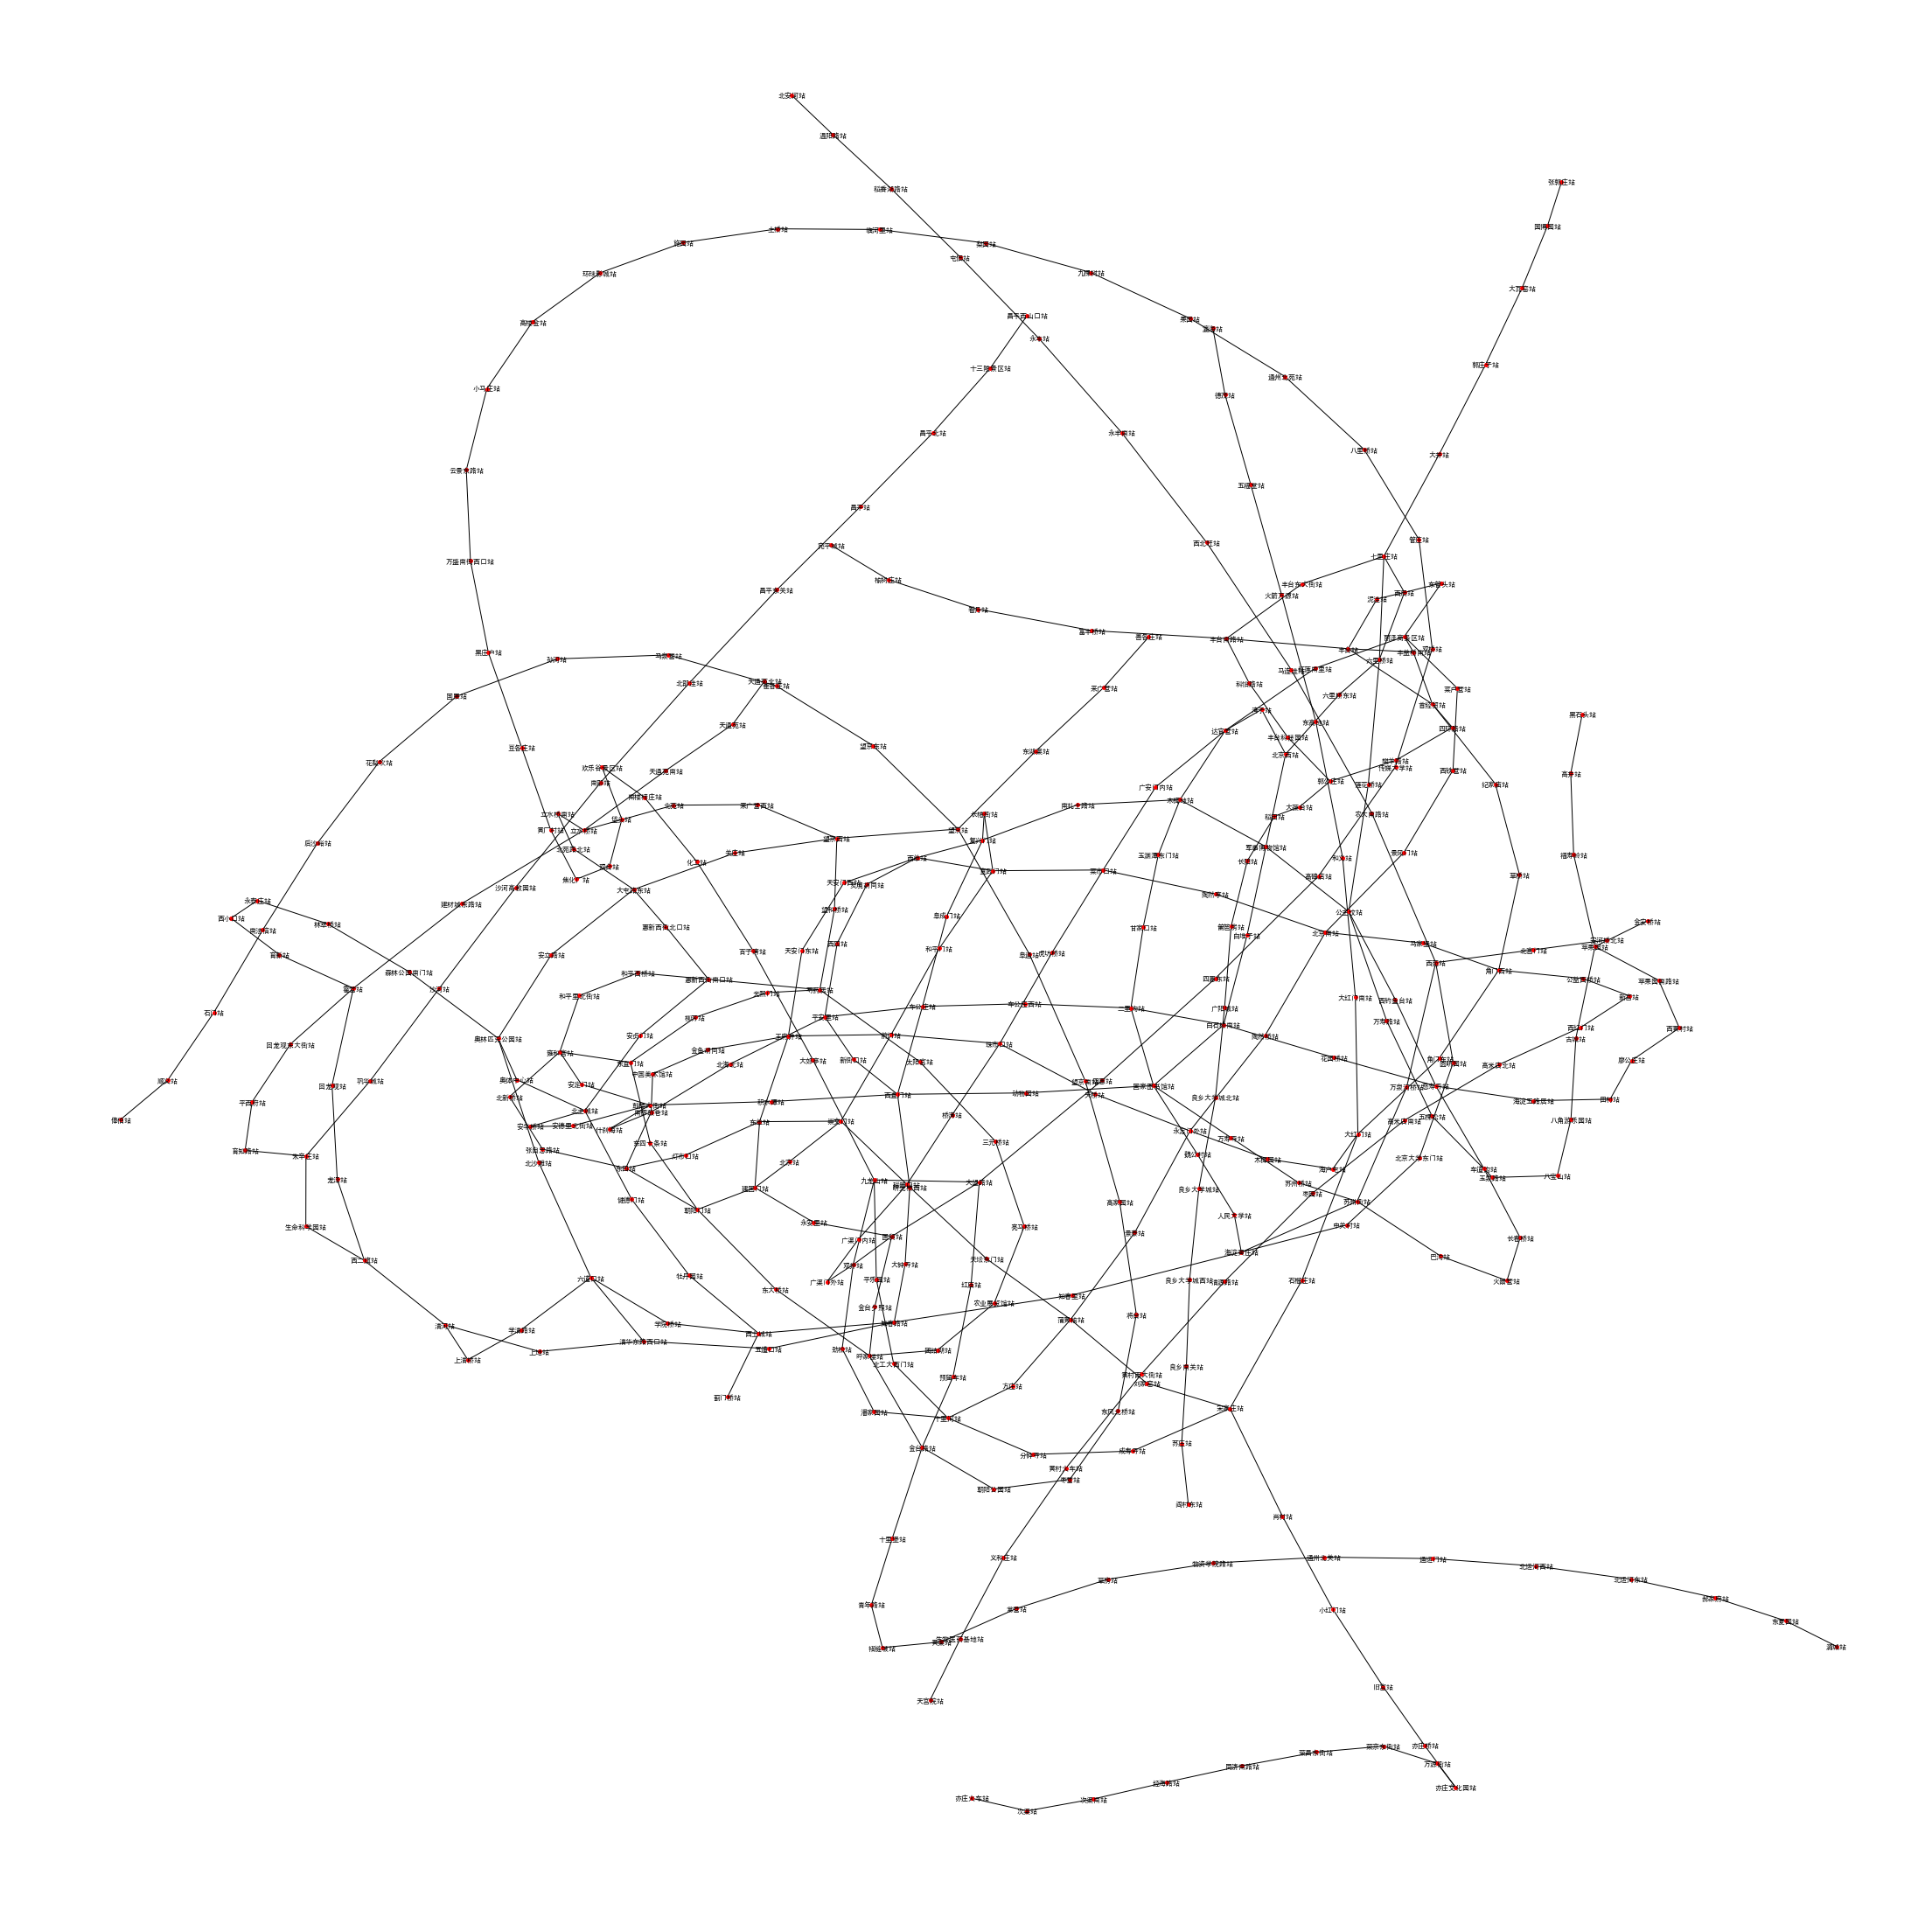

In [17]:
stations_graph = nx.Graph(stations_graph)
nx.draw(stations_graph,with_labels=True,node_size=15,font_size=8)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (30.0, 30.0)
plt.savefig("Beijing Subway.png")           
plt.show() 

In [18]:
def get_successor(frontier,graph):
    return graph[frontier]
def is_goal(node,destination):
    return city == destination

In [42]:
def search_destination(graph,start,get_successor,is_goal_predict,strategy_func):
    pathes = [[start]]
    seen = set()
    chosen_path = []
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in seen: continue
        for city in get_successor(frontier,graph):
            if city in path:continue
            new_path = path + [city]
            pathes.append(new_path)
            if is_goal_predict(city):
                chosen_path.append(new_path)
        seen.add(frontier)
        pathes = strategy_func(pathes)
    chosen_path = strategy_func(chosen_path)
    return chosen_path

In [20]:
def get_path_distance(path):
    distance = []
    for i in range(len(path)-1):
        distance.append(get_city_distance(path[i],path[i+1]))
    return sum(distance)

In [21]:
def sort_pathes(pathes,func,beam):
    return sorted(pathes,key=func)[:beam]

In [22]:
def get_short_distance(pathes):
    return sort_pathes(pathes,lambda p:get_path_distance(p),beam=-1)

In [45]:
def min_transfer(pathes):
    return sort_pathes(pathes,lambda p:len(p),beam = 30)

In [24]:
def comprehensive_sort(pathes):
    return sort_pathes(pathes, lambda p: (len(p) + get_path_distance(p)),beam=-1)

In [50]:
pathes = search_destination(stations_graph,'传媒大学站',get_successor,lambda n:n == '知春路站',min_transfer)

In [51]:
print(pathes)

[['传媒大学站', '高碑店站', '四惠东站', '四惠站', '大望路站', '国贸站', '永安里站', '建国门站', '朝阳门站', '东四站', '南锣鼓巷站', '北海北站', '平安里站', '车公庄站', '西直门站', '明光桥西站', '大钟寺站', '知春路站']]


In [52]:
len(pathes)

1

In [53]:
[len(path) for path in pathes]
    

[18]

In [54]:
pathes[0]

['传媒大学站',
 '高碑店站',
 '四惠东站',
 '四惠站',
 '大望路站',
 '国贸站',
 '永安里站',
 '建国门站',
 '朝阳门站',
 '东四站',
 '南锣鼓巷站',
 '北海北站',
 '平安里站',
 '车公庄站',
 '西直门站',
 '明光桥西站',
 '大钟寺站',
 '知春路站']

In [55]:
for station in pathes[0]:
    print(stations_line[station])

['北京地铁八通线']
['北京地铁八通线']
['北京地铁1号线', '北京地铁八通线']
['北京地铁1号线', '北京地铁八通线']
['北京地铁1号线', '北京地铁14号线']
['北京地铁1号线', '北京地铁10号线']
['北京地铁1号线']
['北京地铁1号线', '北京地铁2号线']
['北京地铁2号线', '北京地铁6号线']
['北京地铁5号线', '北京地铁6号线']
['北京地铁6号线', '北京地铁8号线']
['北京地铁6号线']
['北京地铁4号线', '北京地铁6号线']
['北京地铁2号线', '北京地铁6号线']
['北京地铁2号线', '北京地铁2号线', '北京地铁4号线', '北京地铁13号线']
['北京地铁13号线']
['北京地铁13号线']
['北京地铁10号线', '北京地铁13号线']


## Naive version

In [34]:
def search_destination(graph,start,destination):
    pathes = [[start]]
    seen = set()
    chosen_path = []
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in seen:continue
        for city in graph[frontier]:
            if city in path:continue
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination:
                chosen_path.append(new_path)
        seen.add(frontier)
    return chosen_path  

In [35]:
route = search_destination(stations_graph,'传媒大学站', '知春路站')

In [40]:
route

[['传媒大学站',
  '高碑店站',
  '四惠东站',
  '四惠站',
  '大望路站',
  '国贸站',
  '永安里站',
  '建国门站',
  '朝阳门站',
  '东四站',
  '南锣鼓巷站',
  '北海北站',
  '平安里站',
  '车公庄站',
  '西直门站',
  '明光桥西站',
  '大钟寺站',
  '知春路站']]

In [37]:
for station in route[0]:
    print(stations_line[station])

['北京地铁八通线']
['北京地铁八通线']
['北京地铁1号线', '北京地铁八通线']
['北京地铁1号线', '北京地铁八通线']
['北京地铁1号线', '北京地铁14号线']
['北京地铁1号线', '北京地铁10号线']
['北京地铁1号线']
['北京地铁1号线', '北京地铁2号线']
['北京地铁2号线', '北京地铁6号线']
['北京地铁5号线', '北京地铁6号线']
['北京地铁6号线', '北京地铁8号线']
['北京地铁6号线']
['北京地铁4号线', '北京地铁6号线']
['北京地铁2号线', '北京地铁6号线']
['北京地铁2号线', '北京地铁2号线', '北京地铁4号线', '北京地铁13号线']
['北京地铁13号线']
['北京地铁13号线']
['北京地铁10号线', '北京地铁13号线']
